In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
import pickle as pkl

import numpy as np
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier

from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# **Data Collection**

In [ ]:
#Reading csv file
df = pd.read_csv('HealthCareData.csv')
df.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


# **Basic Model**

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import xgboost as xgb

In [ ]:
data = pd.read_csv('HealthCareData.csv')

In [ ]:
data[data.columns] = data[data.columns].apply(lambda x: x.fillna(x.mode()[0]))

**Handling Categorical Variables**

In [ ]:
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

In [ ]:
#Performing Label Encoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

data.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,2,1,12,2,2,1,1,1,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,0,0
1,2,55,2,1,12,2,2,1,1,1,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,0,0
2,3,55,2,1,12,2,2,1,1,1,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,0,0
3,4,55,2,1,12,2,2,1,1,0,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,0,0
4,5,55,0,1,12,2,2,1,1,1,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,0,0


**Data Splitting**

In [ ]:
x = data.drop('Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)', axis=1).values
y = data['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.93, random_state=42)

In [ ]:
x_train.shape

(66, 41)

In [ ]:
x_test.shape

(884, 41)

### **Model**

In [ ]:
from sklearn.metrics import accuracy_score

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)

GaussianNB()

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
# Create a dictionary to store the machine learning models
model_list = {
    'logistic regression': LogisticRegression(solver='liblinear'),
    'logistic regression CV': LogisticRegressionCV(cv=10, solver='liblinear'),
    'XGBoost': xgb.XGBClassifier(),
    'Ridge classifier': RidgeClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Classifier': SVC(kernel='linear')
}

# Create a list to store the evaluation results
model_eval_info = []

# Evaluate each model and append the results to the list
for model_name, model in model_list.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    metrics = {
        'Name': model_name,
        'Accuracy': accuracy,
        'f1_score': f1,
        'Recall': recall,
        'Precision': precision,
        'All Metrics': (accuracy, f1, recall, precision)
    }
    model_eval_info.append(metrics)

# Create a Pandas DataFrame from the evaluation results
df_model_eval_info = pd.DataFrame(model_eval_info)

# Print or save the DataFrame containing the evaluation results
print(df_model_eval_info.to_string())  # You can modify this line to save the DataFrame to a CSV file

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        Name  Accuracy  f1_score  Recall  Precision                                                         All Metrics
0        logistic regression  0.988688  0.782609     1.0   0.642857    (0.9886877828054299, 0.782608695652174, 1.0, 0.6428571428571429)
1     logistic regression CV  0.994344  0.878049     1.0   0.782609      (0.994343891402715, 0.878048780487805, 1.0, 0.782608695652174)
2                    XGBoost  0.979638  0.000000     0.0   0.000000                                 (0.9796380090497737, 0.0, 0.0, 0.0)
3           Ridge classifier  0.973982  0.610169     1.0   0.439024  (0.9739819004524887, 0.6101694915254238, 1.0, 0.43902439024390244)
4                        KNN  0.979638  0.000000     0.0   0.000000                                 (0.9796380090497737, 0.0, 0.0, 0.0)
5              Random Forest  1.000000  1.000000     1.0   1.000000                                                (1.0, 1.0, 1.0, 1.0)
6  Support Vector Classifier  0.983032  0.705882

# **Handling missing values**

In [ ]:
df.shape

(950, 42)

In [ ]:
df.isnull().any()

S.NO                                                                       False
Age                                                                        False
Gender                                                                     False
Place(location where the patient lives)                                     True
Duration of alcohol consumption(years)                                     False
Quantity of alcohol consumption (quarters/day)                             False
Type of alcohol consumed                                                   False
Hepatitis B infection                                                      False
Hepatitis C infection                                                      False
Diabetes Result                                                            False
Blood pressure (mmhg)                                                      False
Obesity                                                                    False
Family history of cirrhosis/

In [ ]:
df.isnull().sum()

S.NO                                                                         0
Age                                                                          0
Gender                                                                       0
Place(location where the patient lives)                                    134
Duration of alcohol consumption(years)                                       0
Quantity of alcohol consumption (quarters/day)                               0
Type of alcohol consumed                                                     0
Hepatitis B infection                                                        0
Hepatitis C infection                                                        0
Diabetes Result                                                              0
Blood pressure (mmhg)                                                        0
Obesity                                                                      0
Family history of cirrhosis/ hereditary             

In [ ]:
# Drop columns with more than a certain percentage of missing values (e.g., 50%)
threshold = len(df) * 0.5
df = df.dropna(axis=1, thresh=threshold)

# Fill numerical columns with mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Check remaining nulls
print(df.isnull().sum())

S.NO                                                                       0
Age                                                                        0
Gender                                                                     0
Place(location where the patient lives)                                    0
Duration of alcohol consumption(years)                                     0
Quantity of alcohol consumption (quarters/day)                             0
Type of alcohol consumed                                                   0
Hepatitis B infection                                                      0
Hepatitis C infection                                                      0
Diabetes Result                                                            0
Blood pressure (mmhg)                                                      0
Obesity                                                                    0
Family history of cirrhosis/ hereditary                                    0

<ipython-input-23-5b8a0f8e1e30>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())
<ipython-input-23-5b8a0f8e1e30>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


# **Feature Selection**

In [ ]:
dt = df.copy()
dt.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
1,2,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
2,3,55,male,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
3,4,55,male,rural,12,2,branded liquor,negative,negative,NO,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES
4,5,55,female,rural,12,2,branded liquor,negative,negative,YES,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,YES,YES


In [ ]:
categorical_cols = dt.select_dtypes(include=['object']).columns
categorical_cols

Index(['Gender', 'Place(location where the patient lives)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TG', 'LDL',
       'Total Bilirubin    (mg/dl)', 'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'],
      dtype='object')

In [ ]:
# Apply LabelEncoder to each categorical column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_cols:
    dt[col] = le.fit_transform(dt[col])

In [ ]:
dt.head()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
0,1,55,2,1,12,2,2,1,1,1,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,0,0
1,2,55,2,1,12,2,2,1,1,1,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,0,0
2,3,55,2,1,12,2,2,1,1,1,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,0,0
3,4,55,2,1,12,2,2,1,1,0,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,0,0
4,5,55,0,1,12,2,2,1,1,1,...,3.0,6.0,3.0,4.0,0.75,150.0,56,34,0,0


In [ ]:
dt.corr()

,S.NO,Age,Gender,Place(location where the patient lives),Duration of alcohol consumption(years),Quantity of alcohol consumption (quarters/day),Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,...,Indirect (mg/dl),Total Protein (g/dl),Albumin (g/dl),Globulin (g/dl),A/G Ratio,AL.Phosphatase (U/L),SGOT/AST (U/L),SGPT/ALT (U/L),USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not)
S.NO,1.000000,0.066716,-0.068157,-0.095382,0.055557,0.171576,-0.034565,-0.062588,-0.121693,-0.228212,...,0.117131,-0.272354,0.099316,-0.269612,1.183127e-01,0.006050,0.087467,0.041739,3.436598e-01,2.486530e-01
Age,0.066716,1.000000,-0.116125,-0.172989,0.514094,0.150314,-0.009657,-0.007367,-0.024156,0.007873,...,0.235321,0.055869,-0.022349,0.022686,3.484595e-02,0.135055,0.048147,0.125826,-7.034209e-03,6.119463e-03
Gender,-0.068157,-0.116125,1.000000,0.091347,-0.005651,0.071866,-0.064171,0.060323,0.033759,0.134958,...,0.194353,-0.098369,0.035586,-0.047912,-7.476898e-02,-0.024142,-0.066442,-0.312080,2.120197e-02,-2.396136e-02
Place(location where the patient lives),-0.095382,-0.172989,0.091347,1.000000,-0.180778,0.150174,-0.067455,0.028412,0.016244,0.121091,...,-0.017138,0.087895,-0.002929,0.063059,-7.649582e-02,0.009474,-0.095824,-0.114060,-7.421189e-02,6.015672e-03
Duration of alcohol consumption(years),0.055557,0.514094,-0.005651,-0.180778,1.000000,0.228563,-0.233048,-0.019855,-0.039473,-0.070302,...,0.063535,-0.130589,-0.077647,-0.045113,7.947930e-02,0.323161,0.283664,0.217953,-2.245744e-01,-2.565866e-01
Quantity of alcohol consumption (quarters/day),0.171576,0.150314,0.071866,0.150174,0.228563,1.000000,-0.101333,-0.006959,-0.015279,0.086819,...,0.044716,-0.071024,-0.036152,-0.075390,-5.533668e-05,0.122268,0.012366,-0.009317,-1.904590e-02,-1.318698e-02
Type of alcohol consumed,-0.034565,-0.009657,-0.064171,-0.067455,-0.233048,-0.101333,1.000000,-0.030020,0.019898,0.133624,...,-0.034774,0.161390,0.115756,-0.054603,-8.256405e-02,-0.128680,-0.073800,-0.025942,-4.662058e-02,1.005348e-01
Hepatitis B infection,-0.062588,-0.007367,0.060323,0.028412,-0.019855,-0.006959,-0.030020,1.000000,0.919156,0.142926,...,0.070581,0.164541,-0.000058,0.129563,1.556242e-02,-0.107239,-0.256038,-0.139802,-1.088113e-01,-2.114325e-01
Hepatitis C infection,-0.121693,-0.024156,0.033759,0.016244,-0.039473,-0.015279,0.019898,0.919156,1.000000,0.187833,...,0.064330,0.131499,0.003121,0.128283,1.641549e-02,-0.072267,-0.326496,-0.151879,-1.253635e-01,-2.292550e-01
Diabetes Result,-0.228212,0.007873,0.134958,0.121091,-0.070302,0.086819,0.133624,0.142926,0.187833,1.000000,...,0.148901,0.204254,0.138803,0.136817,-1.046115e-01,0.266436,-0.245477,-0.236080,-1.998983e-01,-2.142912e-01


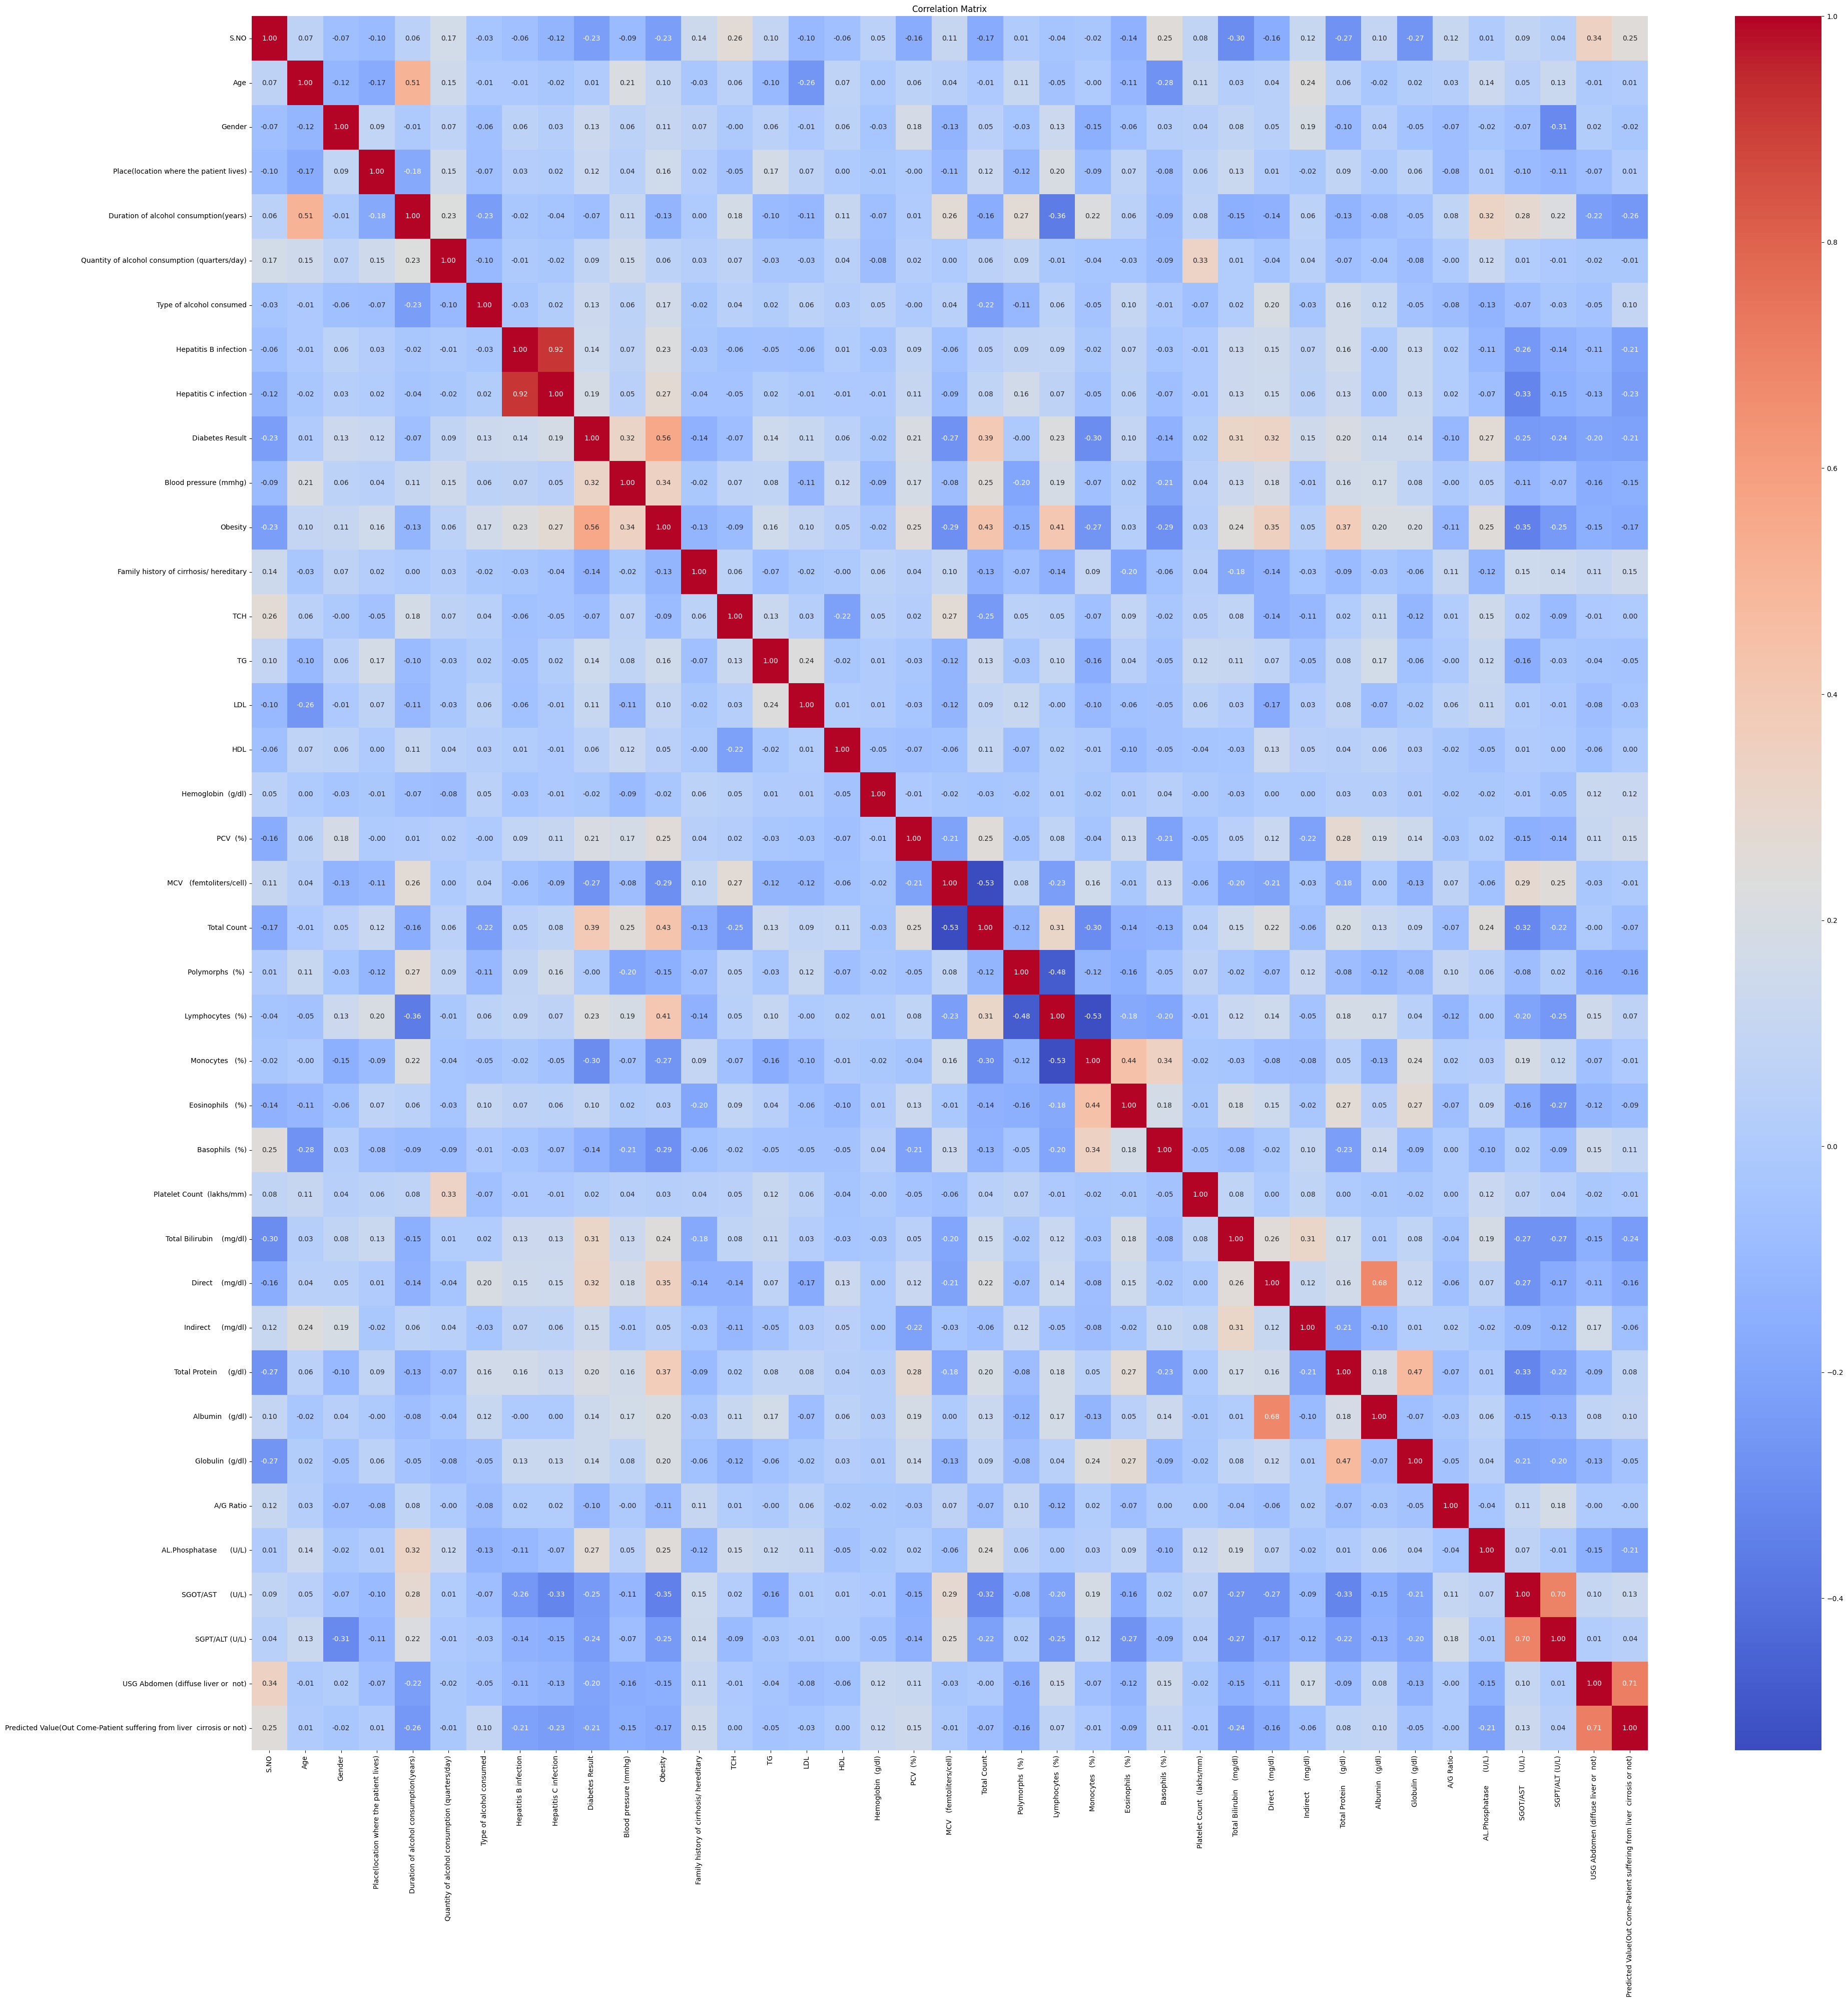

In [ ]:
# Plot heatmap
plt.figure(figsize=(45, 45))
sns.heatmap(dt.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, f_oneway

In [ ]:
dt.columns

Index(['S.NO', 'Age', 'Gender', 'Place(location where the patient lives)',
       'Duration of alcohol consumption(years)',
       'Quantity of alcohol consumption (quarters/day)',
       'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Blood pressure (mmhg)',
       'Obesity', 'Family history of cirrhosis/ hereditary', 'TCH', 'TG',
       'LDL', 'HDL', 'Hemoglobin  (g/dl)', 'PCV  (%)',
       'MCV   (femtoliters/cell)', 'Total Count', 'Polymorphs  (%) ',
       'Lymphocytes  (%)', 'Monocytes   (%)', 'Eosinophils   (%)',
       'Basophils  (%)', 'Platelet Count  (lakhs/mm)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Indirect     (mg/dl)', 'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'Globulin  (g/dl)', 'A/G Ratio', 'AL.Phosphatase      (U/L)',
       'SGOT/AST      (U/L)', 'SGPT/ALT (U/L)',
       'USG Abdomen (diffuse liver or  not)',
       'Predicted Value(Out Come-Patient suffering from liver 

In [ ]:
categorical_cols = dt.select_dtypes(include=['object']).columns
categorical_cols

Index([], dtype='object')

In [ ]:
categorical_features = [
    'Gender',
    'Place(location where the patient lives)',
    'Type of alcohol consumed',
    'Hepatitis B infection',
    'Hepatitis C infection',
    'Diabetes Result',
    'Obesity',
    'Family history of cirrhosis/ hereditary',
    'USG Abdomen (diffuse liver or  not)',
    'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'
]

continuous_features = [
    'S.NO',
    'Age',
    'Duration of alcohol consumption(years)',
    'Quantity of alcohol consumption (quarters/day)',
    'TCH',
    'TG',
    'LDL',
    'HDL',
    'Hemoglobin  (g/dl)',
    'PCV  (%)',
    'MCV   (femtoliters/cell)',
    'Total Count',
    'Polymorphs  (%) ',
    'Lymphocytes  (%)',
    'Monocytes   (%)',
    'Eosinophils   (%)',
    'Basophils  (%)',
    'Platelet Count  (lakhs/mm)',
    'Total Bilirubin    (mg/dl)',
    'Direct    (mg/dl)',
    'Indirect     (mg/dl)',
    'Total Protein     (g/dl)',
    'Albumin   (g/dl)',
    'Globulin  (g/dl)',
    'A/G Ratio',
    'AL.Phosphatase      (U/L)',
    'SGOT/AST      (U/L)',
    'SGPT/ALT (U/L)'
]

target = 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'

**Perform Chi-Square Test for Categorical Variables**

In [ ]:
# Function to perform Chi-Square Test
def chi_square_test(feature):
    contingency_table = pd.crosstab(data[feature], data[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    return p

# Apply Chi-Square Test to categorical features
chi_square_results = {feature: chi_square_test(feature) for feature in categorical_features}

# Display Chi-Square Test results
chi_square_results

{'Gender': 4.387957567463679e-112,
 'Place(location where the patient lives)': 0.9746561332503542,
 'Type of alcohol consumed': 0.02035781031306533,
 'Hepatitis B infection': 5.249198097919266e-10,
 'Hepatitis C infection': 1.0079647430582845e-11,
 'Diabetes Result': 1.9856492285104216e-10,
 'Obesity': 4.194483532070677e-07,
 'Family history of cirrhosis/ hereditary': 4.856488108029175e-06,
 'USG Abdomen (diffuse liver or  not)': 1.8945831931100896e-100,
 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)': 3.433436134426849e-198}

**Perform ANOVA for Continuous Variables**

In [ ]:
# Function to perform ANOVA
def anova_test(feature):
    groups = [data[data[target] == level][feature] for level in data[target].unique()]
    f_val, p_val = f_oneway(*groups)
    return p_val

# Apply ANOVA to continuous features
anova_results = {feature: anova_test(feature) for feature in continuous_features}

# Display ANOVA results
anova_results

{'S.NO': 7.463905784526449e-15,
 'Age': 0.8505882169590702,
 'Duration of alcohol consumption(years)': 9.51346051694435e-16,
 'Quantity of alcohol consumption (quarters/day)': 0.6847921237961736,
 'TCH': 0.029712863018941334,
 'TG': 0.14357328939281136,
 'LDL': 0.30585791971771537,
 'HDL': 0.025267846564071616,
 'Hemoglobin  (g/dl)': 0.00012782099410899394,
 'PCV  (%)': 2.585582783847721e-06,
 'MCV   (femtoliters/cell)': 0.8252491951357489,
 'Total Count': 0.025279122159969594,
 'Polymorphs  (%) ': 7.588816424669453e-07,
 'Lymphocytes  (%)': 0.040636577379106135,
 'Monocytes   (%)': 0.769371506735389,
 'Eosinophils   (%)': 0.006531834100238041,
 'Basophils  (%)': 0.0006766825992568457,
 'Platelet Count  (lakhs/mm)': 0.7431099951995257,
 'Total Bilirubin    (mg/dl)': 1.367855338750991e-13,
 'Direct    (mg/dl)': 4.1140616896652894e-07,
 'Indirect     (mg/dl)': 0.06779850407076815,
 'Total Protein     (g/dl)': 0.007812970205786002,
 'Albumin   (g/dl)': 0.0019203789561485424,
 'Globulin  (

**Combine Results**

In [ ]:
# Combine results
all_results = {**chi_square_results, **anova_results}

# Display all results
all_results

{'Gender': 4.387957567463679e-112,
 'Place(location where the patient lives)': 0.9746561332503542,
 'Type of alcohol consumed': 0.02035781031306533,
 'Hepatitis B infection': 5.249198097919266e-10,
 'Hepatitis C infection': 1.0079647430582845e-11,
 'Diabetes Result': 1.9856492285104216e-10,
 'Obesity': 4.194483532070677e-07,
 'Family history of cirrhosis/ hereditary': 4.856488108029175e-06,
 'USG Abdomen (diffuse liver or  not)': 1.8945831931100896e-100,
 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)': 3.433436134426849e-198,
 'S.NO': 7.463905784526449e-15,
 'Age': 0.8505882169590702,
 'Duration of alcohol consumption(years)': 9.51346051694435e-16,
 'Quantity of alcohol consumption (quarters/day)': 0.6847921237961736,
 'TCH': 0.029712863018941334,
 'TG': 0.14357328939281136,
 'LDL': 0.30585791971771537,
 'HDL': 0.025267846564071616,
 'Hemoglobin  (g/dl)': 0.00012782099410899394,
 'PCV  (%)': 2.585582783847721e-06,
 'MCV   (femtoliters/cell)': 0.82524919513574

**Filter Significant Features**

In [ ]:
significance_level = 0.05 #(alpha-value)assumption
significant_features = [feature for feature, p_value in all_results.items() if p_value < significance_level]

# Display significant features
significant_features

['Gender',
 'Type of alcohol consumed',
 'Hepatitis B infection',
 'Hepatitis C infection',
 'Diabetes Result',
 'Obesity',
 'Family history of cirrhosis/ hereditary',
 'USG Abdomen (diffuse liver or  not)',
 'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)',
 'S.NO',
 'Duration of alcohol consumption(years)',
 'TCH',
 'HDL',
 'Hemoglobin  (g/dl)',
 'PCV  (%)',
 'Total Count',
 'Polymorphs  (%) ',
 'Lymphocytes  (%)',
 'Eosinophils   (%)',
 'Basophils  (%)',
 'Total Bilirubin    (mg/dl)',
 'Direct    (mg/dl)',
 'Total Protein     (g/dl)',
 'Albumin   (g/dl)',
 'AL.Phosphatase      (U/L)',
 'SGOT/AST      (U/L)']

In [ ]:
df = df[significant_features].copy()
df.head()

,Gender,Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Obesity,Family history of cirrhosis/ hereditary,USG Abdomen (diffuse liver or not),Predicted Value(Out Come-Patient suffering from liver cirrosis or not),S.NO,...,Polymorphs (%),Lymphocytes (%),Eosinophils (%),Basophils (%),Total Bilirubin (mg/dl),Direct (mg/dl),Total Protein (g/dl),Albumin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L)
0,male,branded liquor,negative,negative,YES,yes,no,YES,YES,1,...,60.0,35.0,3.0,0.0,7,4.0,6.0,3.0,150.0,56
1,male,branded liquor,negative,negative,YES,yes,no,YES,YES,2,...,60.0,35.0,3.0,0.0,7,4.0,6.0,3.0,150.0,56
2,male,branded liquor,negative,negative,YES,no,no,YES,YES,3,...,60.0,35.0,3.0,0.0,7,4.0,6.0,3.0,150.0,56
3,male,branded liquor,negative,negative,NO,no,no,YES,YES,4,...,60.0,35.0,3.0,0.0,7,4.0,6.0,3.0,150.0,56
4,female,branded liquor,negative,negative,YES,no,no,YES,YES,5,...,60.0,35.0,3.0,0.0,7,4.0,6.0,3.0,150.0,56


In [ ]:
#Since 'USG Abdomen (diffuse liver or  not)' is highly correlated with the target feature, lets drop the column
df = df.drop(columns=['USG Abdomen (diffuse liver or  not)', 'S.NO'])

# **Visual Analysis**

In [ ]:
df.columns

Index(['Gender', 'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Obesity',
       'Family history of cirrhosis/ hereditary',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)',
       'Duration of alcohol consumption(years)', 'TCH', 'HDL',
       'Hemoglobin  (g/dl)', 'PCV  (%)', 'Total Count', 'Polymorphs  (%) ',
       'Lymphocytes  (%)', 'Eosinophils   (%)', 'Basophils  (%)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)'],
      dtype='object')

**Univariate analysis**

**Bivariate analysis**

# **Handling Categorical Values and Outliers**

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['Gender', 'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Obesity',
       'Family history of cirrhosis/ hereditary',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)',
       'Total Bilirubin    (mg/dl)'],
      dtype='object')

In [ ]:
for col in categorical_cols:
    unique_count = len(df[col].unique())
    print(f"{col}: {unique_count}")

Gender: 4
Type of alcohol consumed: 4
Hepatitis B infection: 3
Hepatitis C infection: 3
Diabetes Result: 2
Obesity: 2
Family history of cirrhosis/ hereditary: 3
Predicted Value(Out Come-Patient suffering from liver  cirrosis or not): 2
Total Bilirubin    (mg/dl): 49


In [ ]:
df.columns

Index(['Gender', 'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Obesity',
       'Family history of cirrhosis/ hereditary',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)',
       'Duration of alcohol consumption(years)', 'TCH', 'HDL',
       'Hemoglobin  (g/dl)', 'PCV  (%)', 'Total Count', 'Polymorphs  (%) ',
       'Lymphocytes  (%)', 'Eosinophils   (%)', 'Basophils  (%)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)'],
      dtype='object')

**Label Encoder**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Gender,Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Obesity,Family history of cirrhosis/ hereditary,Predicted Value(Out Come-Patient suffering from liver cirrosis or not),Duration of alcohol consumption(years),TCH,...,Polymorphs (%),Lymphocytes (%),Eosinophils (%),Basophils (%),Total Bilirubin (mg/dl),Direct (mg/dl),Total Protein (g/dl),Albumin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L)
0,2,2,1,1,1,1,1,0,12,205.000000,...,60.0,35.0,3.0,0.0,33,4.0,6.0,3.0,150.0,56
1,2,2,1,1,1,1,1,0,12,205.000000,...,60.0,35.0,3.0,0.0,33,4.0,6.0,3.0,150.0,56
2,2,2,1,1,1,0,1,0,12,205.000000,...,60.0,35.0,3.0,0.0,33,4.0,6.0,3.0,150.0,56
3,2,2,1,1,0,0,1,0,12,197.544839,...,60.0,35.0,3.0,0.0,33,4.0,6.0,3.0,150.0,56
4,0,2,1,1,1,0,1,0,12,205.000000,...,60.0,35.0,3.0,0.0,33,4.0,6.0,3.0,150.0,56


### Handling Outliers in Data

In [ ]:
df.shape

(950, 24)

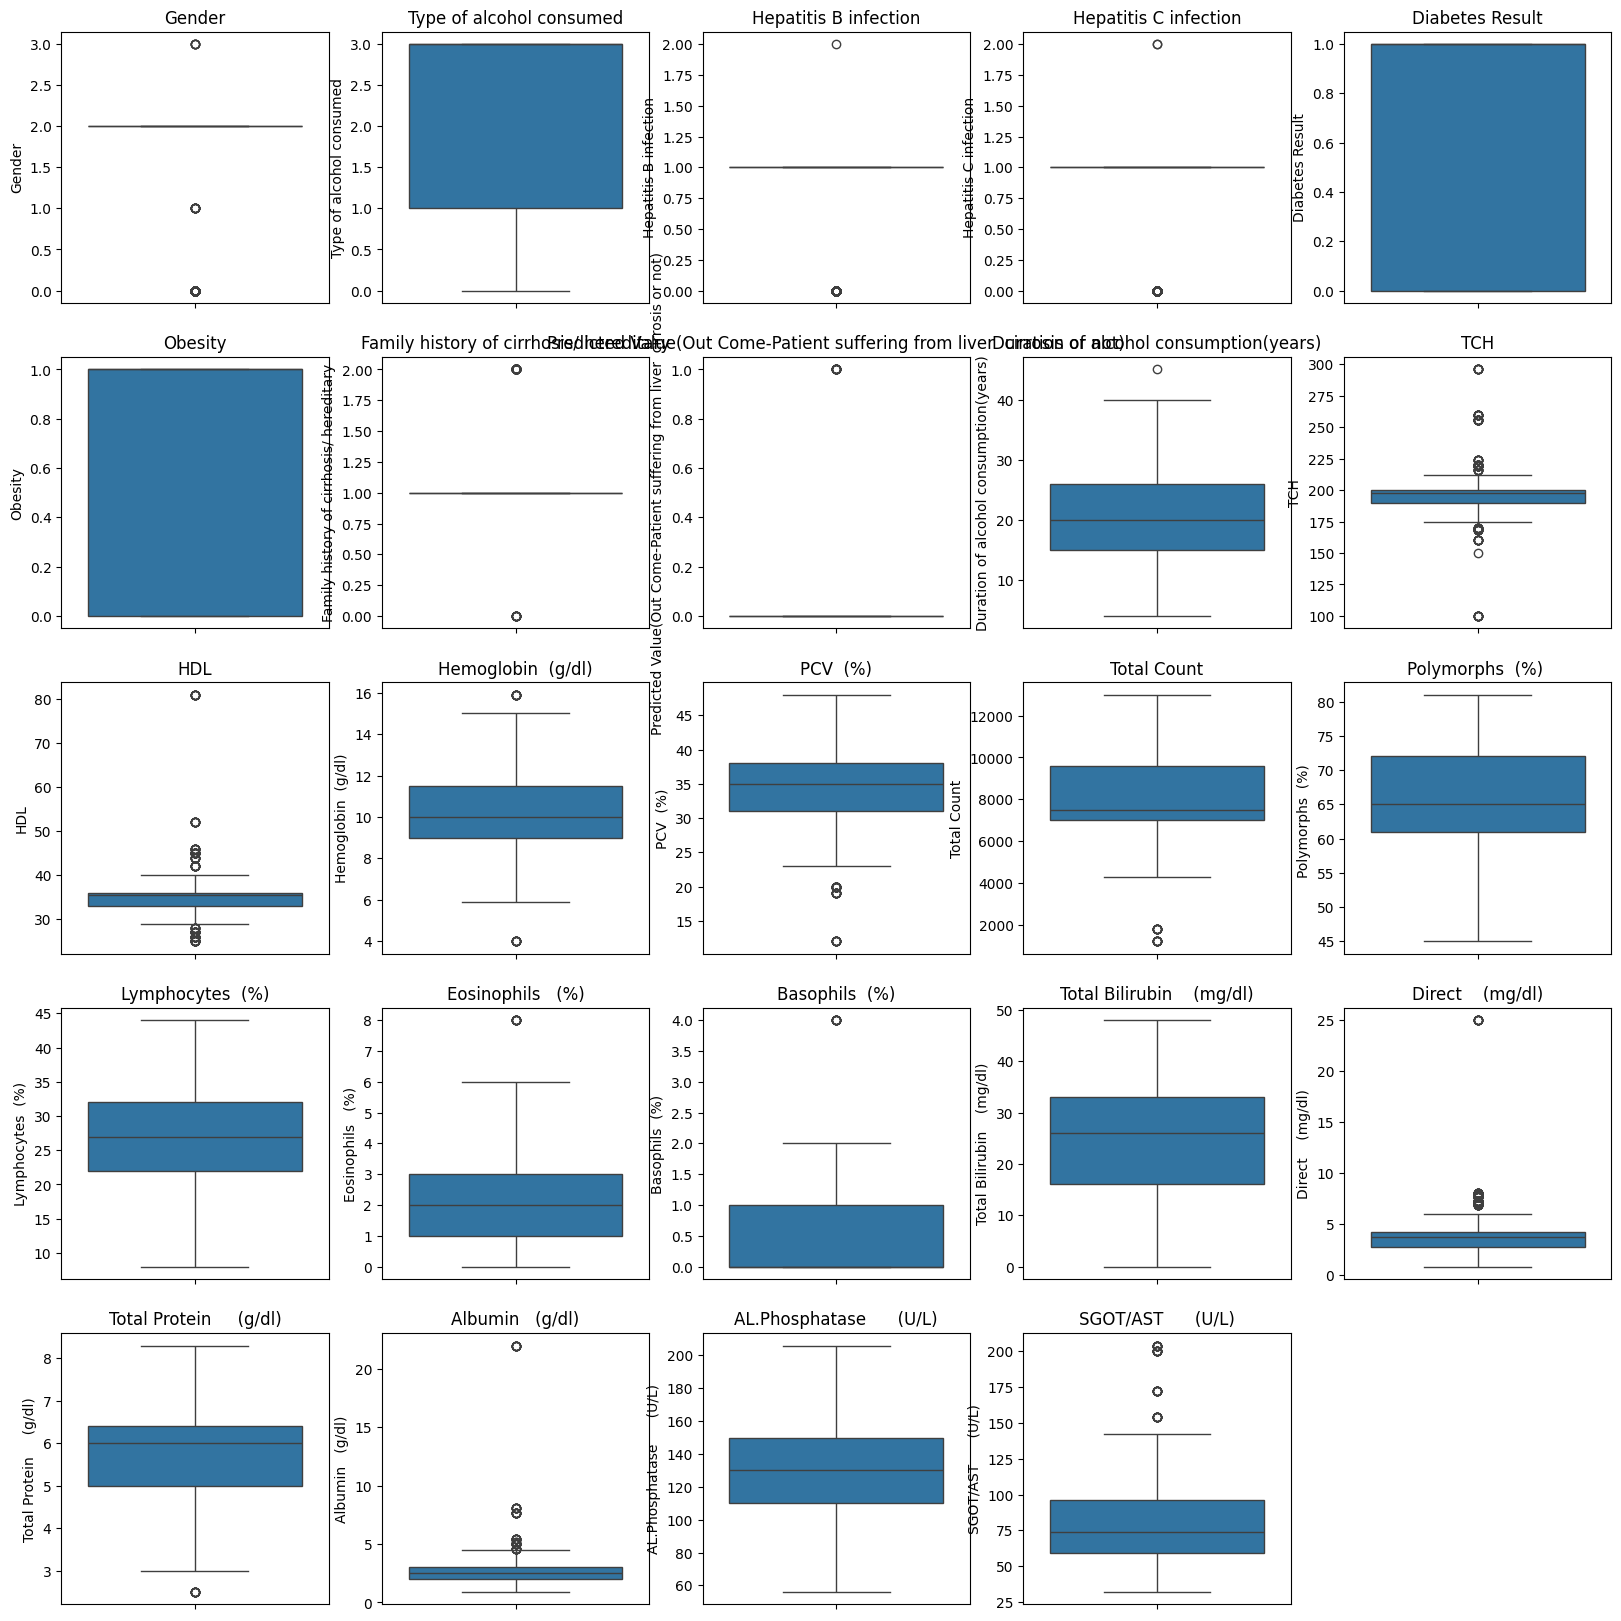

In [ ]:
c=0
plt.figure(figsize=(20, 50))  # Set the figure size

for i in df.columns:
  # Iterate through each column
  if type(df[i][0]) != str:  # Check if the data type is not string
    plt.subplot(12, 5, c+1)  # Create a subplot at position c+1 in a 12x5 grid
    sns.boxplot(df[i])  # Create a boxplot of the column
    plt.title(i)  # Set the title of the subplot to the column name
    c += 1  # Increment counter c

plt.show()  # Display the plot

In [ ]:
df.columns

Index(['Gender', 'Type of alcohol consumed', 'Hepatitis B infection',
       'Hepatitis C infection', 'Diabetes Result', 'Obesity',
       'Family history of cirrhosis/ hereditary',
       'Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)',
       'Duration of alcohol consumption(years)', 'TCH', 'HDL',
       'Hemoglobin  (g/dl)', 'PCV  (%)', 'Total Count', 'Polymorphs  (%) ',
       'Lymphocytes  (%)', 'Eosinophils   (%)', 'Basophils  (%)',
       'Total Bilirubin    (mg/dl)', 'Direct    (mg/dl)',
       'Total Protein     (g/dl)', 'Albumin   (g/dl)',
       'AL.Phosphatase      (U/L)', 'SGOT/AST      (U/L)'],
      dtype='object')

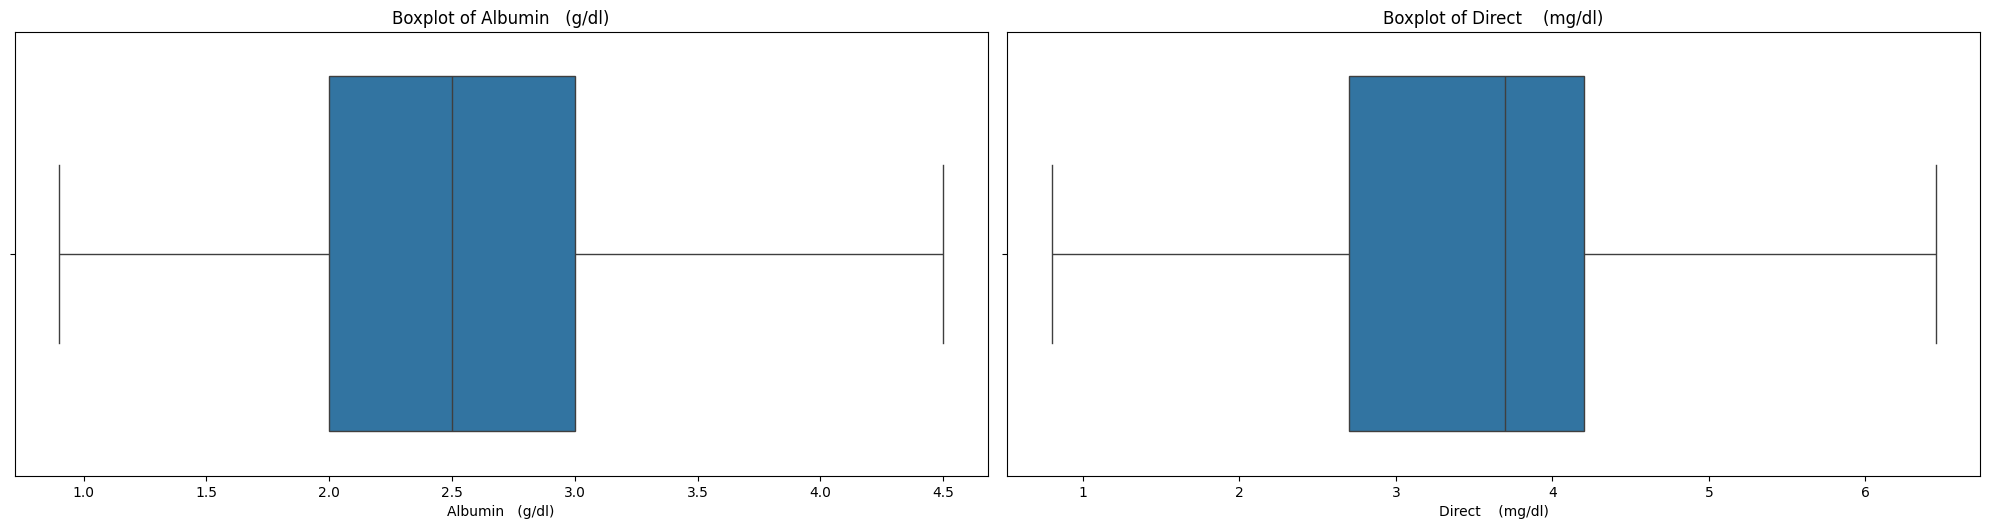

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of columns to perform outlier handling
lipid_profile_cols = ['Albumin   (g/dl)', 'Direct    (mg/dl)']

# Function to cap outliers using IQR method
def cap_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    return df

# Apply outlier handling for each column in the list
for col in lipid_profile_cols:
    df = cap_outliers(df, col)

# Visualize the results using boxplots
plt.figure(figsize=(20, 15))  # Set the figure size
for i, col in enumerate(lipid_profile_cols):
    plt.subplot(3, 2, i+1)  # Create a subplot for each column
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

# **Data Splitting**

In [ ]:
df.shape

(950, 24)

In [ ]:
x = df.drop('Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)', axis=1).values
y = df['Predicted Value(Out Come-Patient suffering from liver  cirrosis or not)'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.93, random_state=42)

In [ ]:
x_train

array([[  2. ,   3. ,   1. , ...,   3. , 122. ,  96. ],
       [  2. ,   2. ,   1. , ...,   3. , 115. ,  55. ],
       [  2. ,   2. ,   1. , ...,   4.5, 158. ,  86. ],
       ...,
       [  2. ,   1. ,   0. , ...,   2. , 157. ,  88. ],
       [  0. ,   3. ,   0. , ...,   2.5, 152. , 172. ],
       [  2. ,   3. ,   1. , ...,   2. , 110. ,  86. ]])

In [ ]:
x_test

array([[  2. ,   1. ,   0. , ...,   1.4, 114. , 204. ],
       [  2. ,   1. ,   1. , ...,   3. , 120. , 110. ],
       [  2. ,   1. ,   0. , ...,   1.2, 184. ,  72. ],
       ...,
       [  2. ,   3. ,   1. , ...,   2. , 100. ,  94. ],
       [  2. ,   2. ,   1. , ...,   4.5, 158. ,  86. ],
       [  0. ,   3. ,   1. , ...,   2.8, 163. ,  67. ]])

In [ ]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# **Data Analysis**

In [ ]:
df.describe()

,Gender,Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Obesity,Family history of cirrhosis/ hereditary,Predicted Value(Out Come-Patient suffering from liver cirrosis or not),Duration of alcohol consumption(years),TCH,...,Polymorphs (%),Lymphocytes (%),Eosinophils (%),Basophils (%),Total Bilirubin (mg/dl),Direct (mg/dl),Total Protein (g/dl),Albumin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L)
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,...,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,1.583158,2.197895,0.836842,0.856842,0.681053,0.577895,1.057895,0.021053,20.606316,197.544839,...,66.911579,26.027368,2.293100,0.498557,25.094737,3.722579,5.590326,2.551131,132.524468,81.794737
std,0.815376,0.878736,0.372544,0.356382,0.466314,0.494155,0.282649,0.143635,7.980664,21.048555,...,6.352465,7.227777,1.481585,0.693907,11.823673,1.590711,1.271366,0.870341,27.317484,31.106923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,100.000000,...,45.000000,8.000000,0.000000,0.000000,0.000000,0.800000,2.500000,0.900000,56.000000,32.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,15.000000,190.000000,...,61.000000,22.000000,1.000000,0.000000,16.000000,2.700000,5.000000,2.000000,110.000000,59.000000
50%,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,197.544839,...,65.000000,27.000000,2.000000,0.000000,26.000000,3.700000,6.000000,2.500000,130.000000,74.000000
75%,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,26.000000,200.000000,...,72.000000,32.000000,3.000000,1.000000,33.000000,4.200000,6.400000,3.000000,150.000000,96.000000
max,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,45.000000,296.000000,...,81.000000,44.000000,8.000000,4.000000,48.000000,6.450000,8.300000,4.500000,206.000000,204.000000


In [ ]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 64, 1: 2}


Since the dataset is more imbalance, lets apply SMOTE on training dataset

### SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(k_neighbors=1)

In [ ]:
x_train,y_train = smote.fit_resample(x_train,y_train)

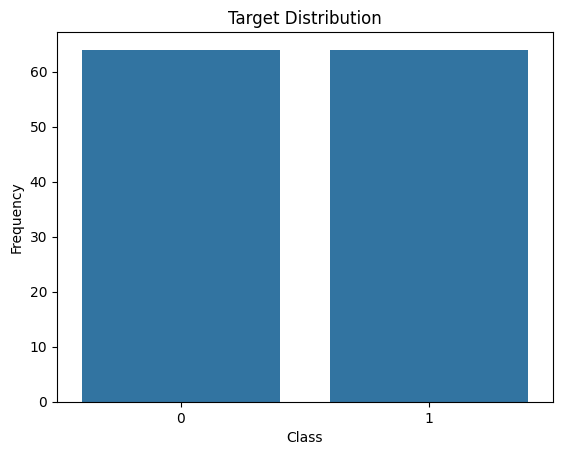

In [ ]:
# Convert y_train to a Pandas Series
y_train_series = pd.Series(y_train)

# Plot the distribution
sns.countplot(x=y_train_series)
plt.title('Target Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### Correlation

In [ ]:
corr_matrix = df.corr()
corr_matrix

,Gender,Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Obesity,Family history of cirrhosis/ hereditary,Predicted Value(Out Come-Patient suffering from liver cirrosis or not),Duration of alcohol consumption(years),TCH,...,Polymorphs (%),Lymphocytes (%),Eosinophils (%),Basophils (%),Total Bilirubin (mg/dl),Direct (mg/dl),Total Protein (g/dl),Albumin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L)
Gender,1.000000,-0.064171,0.060323,0.033759,0.134958,0.109438,0.068247,-2.396136e-02,-0.005651,-4.539500e-03,...,-0.034384,0.134609,-0.058209,0.034332,0.083999,0.035049,-0.098369,0.040905,-0.024142,-0.066442
Type of alcohol consumed,-0.064171,1.000000,-0.030020,0.019898,0.133624,0.165877,-0.016479,1.005348e-01,-0.233048,4.342311e-02,...,-0.107670,0.063519,0.101934,-0.012880,0.015739,0.246965,0.161390,0.170448,-0.128680,-0.073800
Hepatitis B infection,0.060323,-0.030020,1.000000,0.919156,0.142926,0.226516,-0.030285,-2.114325e-01,-0.019855,-5.678700e-02,...,0.085621,0.091276,0.069550,-0.034400,0.131976,0.218177,0.164541,-0.027217,-0.107239,-0.256038
Hepatitis C infection,0.033759,0.019898,0.919156,1.000000,0.187833,0.272810,-0.043165,-2.292550e-01,-0.039473,-4.578574e-02,...,0.161966,0.067385,0.061590,-0.072063,0.131009,0.214355,0.131499,-0.004573,-0.072267,-0.326496
Diabetes Result,0.134958,0.133624,0.142926,0.187833,1.000000,0.558361,-0.139573,-2.142912e-01,-0.070302,-7.410111e-02,...,-0.001278,0.226196,0.095524,-0.142602,0.313951,0.431558,0.204254,0.172379,0.266436,-0.245477
Obesity,0.109438,0.165877,0.226516,0.272810,0.558361,1.000000,-0.126626,-1.715882e-01,-0.126081,-8.905678e-02,...,-0.152016,0.408786,0.033736,-0.286507,0.243111,0.475025,0.373371,0.324890,0.249739,-0.347643
Family history of cirrhosis/ hereditary,0.068247,-0.016479,-0.030285,-0.043165,-0.139573,-0.126626,1.000000,1.516334e-01,0.003108,5.946428e-02,...,-0.069918,-0.144169,-0.195316,-0.060768,-0.175062,-0.198138,-0.091452,-0.020613,-0.119529,0.146129
Predicted Value(Out Come-Patient suffering from liver cirrosis or not),-0.023961,0.100535,-0.211432,-0.229255,-0.214291,-0.171588,0.151633,1.000000e+00,-0.256587,3.922497e-16,...,-0.159638,0.066435,-0.088445,0.106028,-0.236954,-0.253893,0.078439,0.281342,-0.214975,0.133038
Duration of alcohol consumption(years),-0.005651,-0.233048,-0.019855,-0.039473,-0.070302,-0.126081,0.003108,-2.565866e-01,1.000000,1.764832e-01,...,0.267046,-0.361683,0.056632,-0.094903,-0.148016,-0.234178,-0.130589,-0.253855,0.323161,0.283664
TCH,-0.004540,0.043423,-0.056787,-0.045786,-0.074101,-0.089057,0.059464,3.922497e-16,0.176483,1.000000e+00,...,0.054906,0.045663,0.089868,-0.020356,0.082733,-0.207421,0.015265,0.152180,0.151183,0.024203


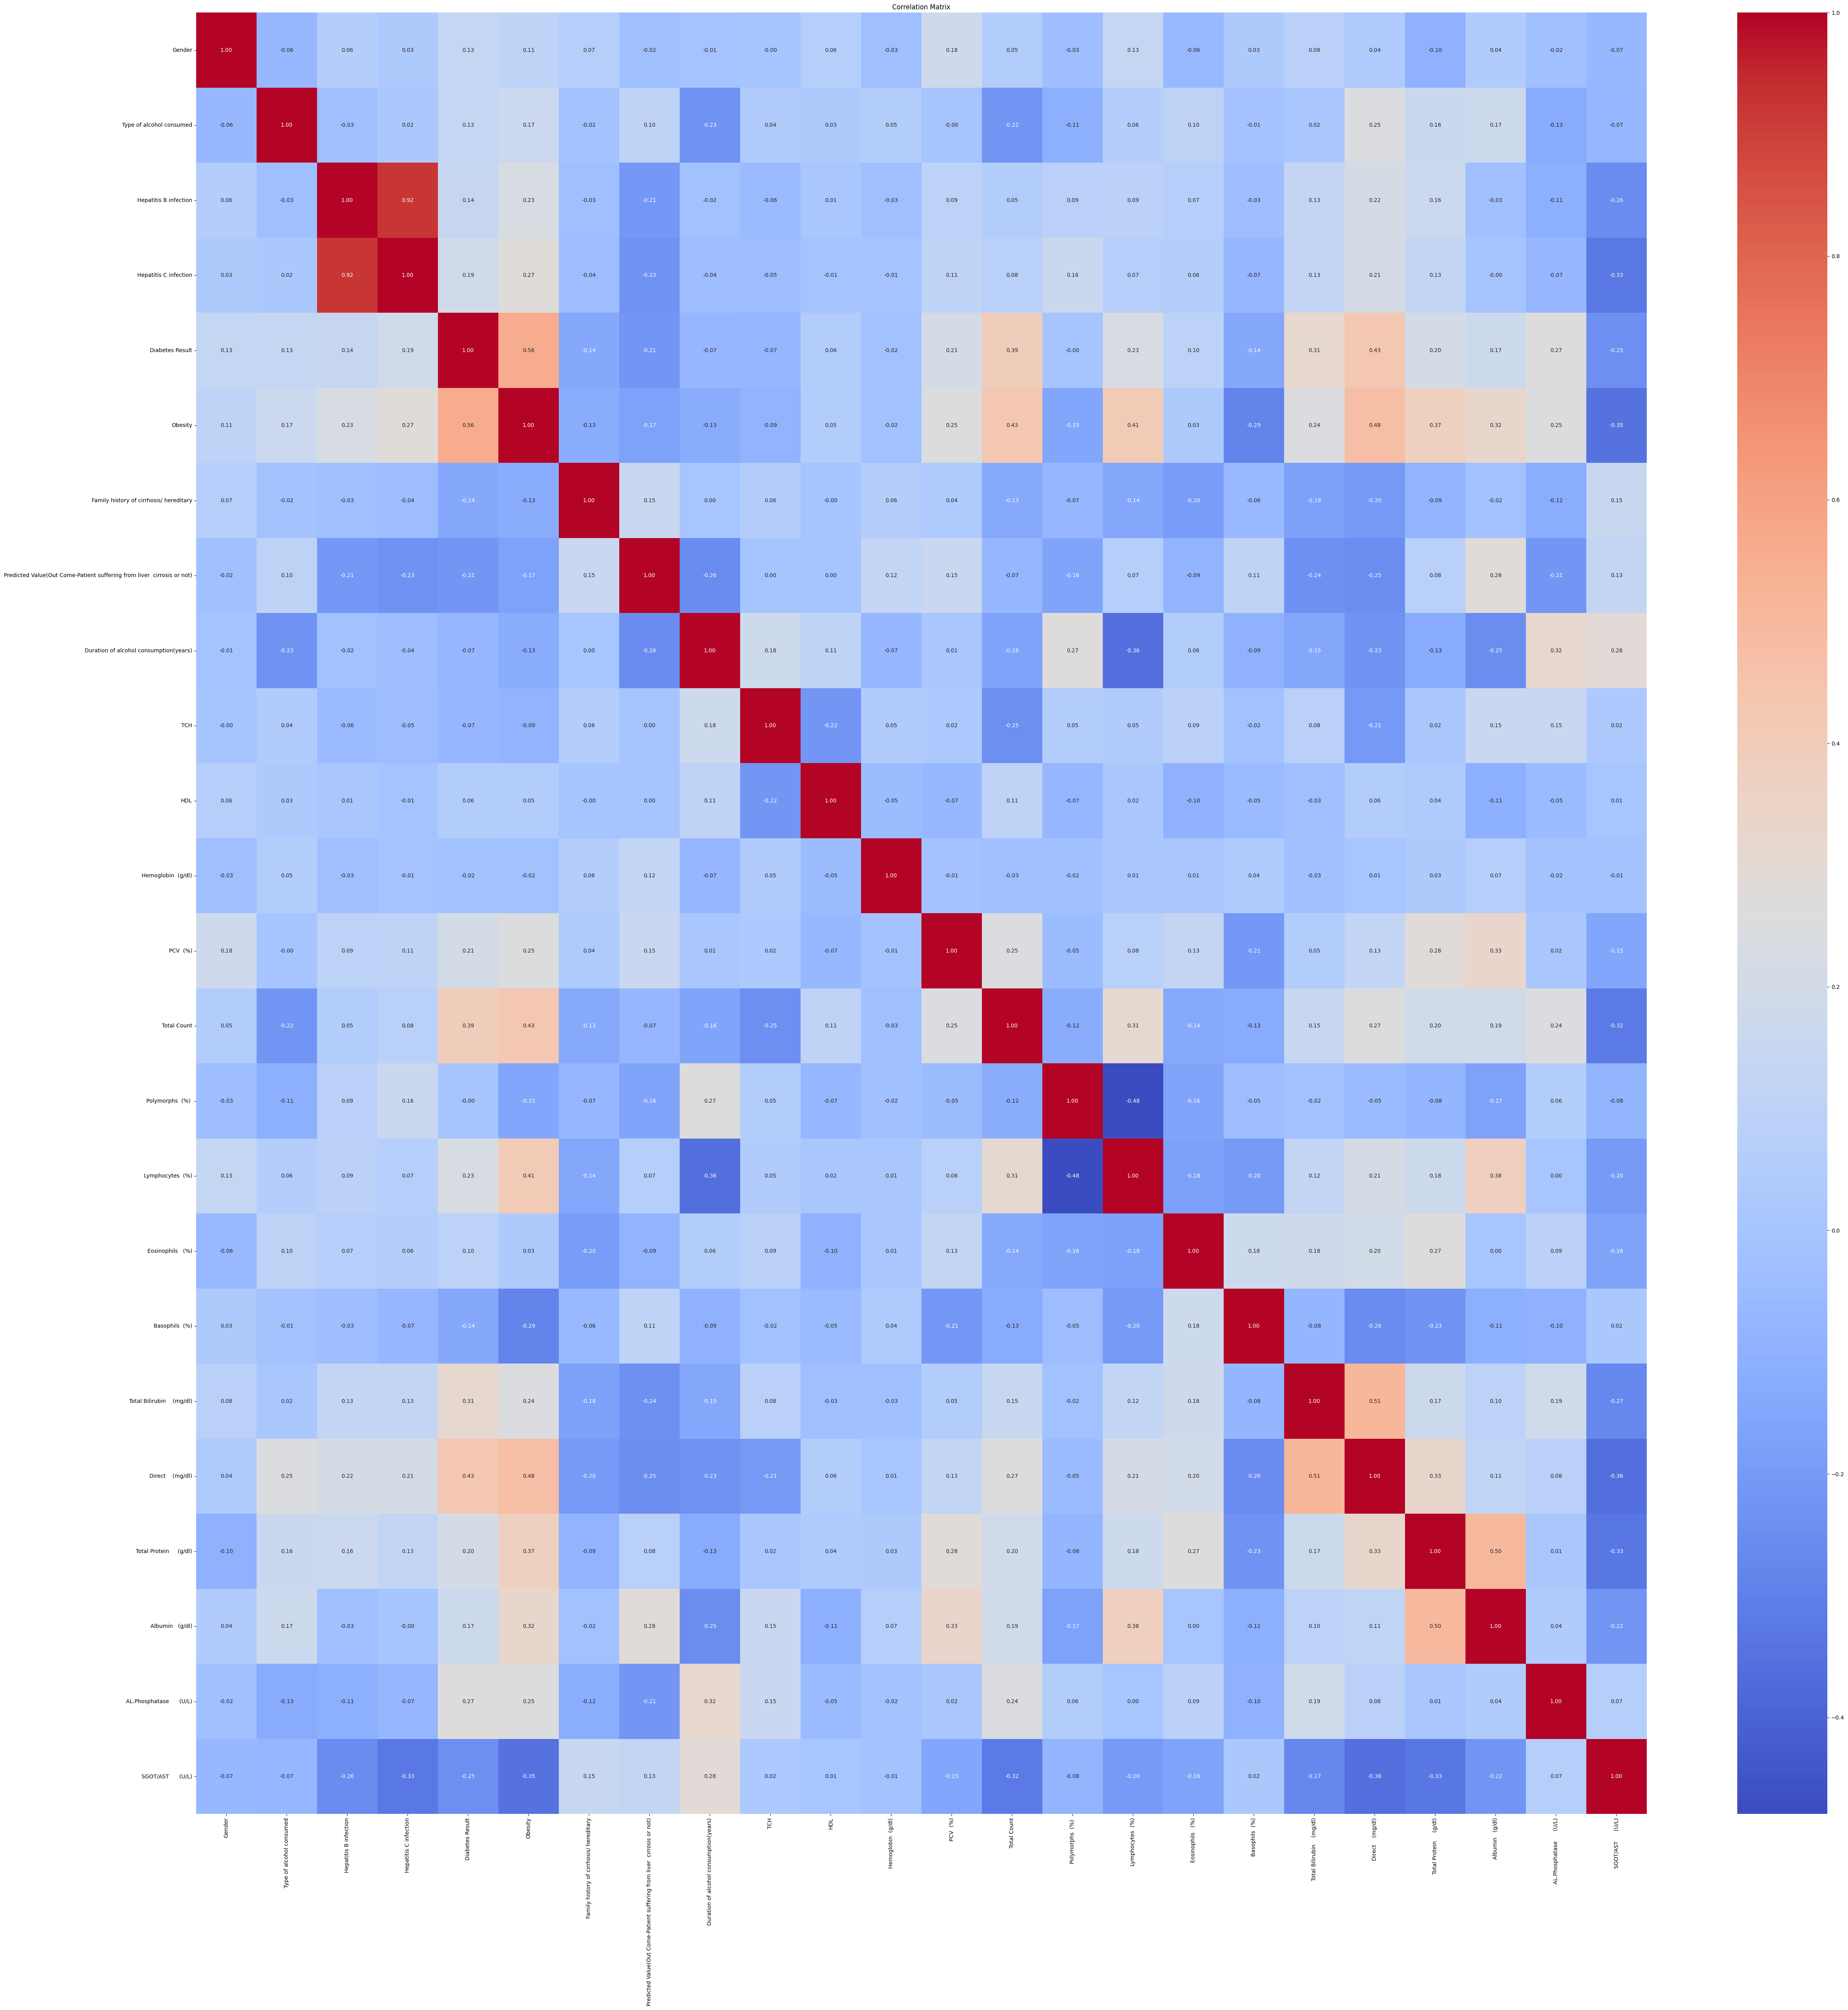

In [ ]:
# Plot heatmap
plt.figure(figsize=(60, 60))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.describe()

,Gender,Type of alcohol consumed,Hepatitis B infection,Hepatitis C infection,Diabetes Result,Obesity,Family history of cirrhosis/ hereditary,Predicted Value(Out Come-Patient suffering from liver cirrosis or not),Duration of alcohol consumption(years),TCH,...,Polymorphs (%),Lymphocytes (%),Eosinophils (%),Basophils (%),Total Bilirubin (mg/dl),Direct (mg/dl),Total Protein (g/dl),Albumin (g/dl),AL.Phosphatase (U/L),SGOT/AST (U/L)
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,...,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,1.583158,2.197895,0.836842,0.856842,0.681053,0.577895,1.057895,0.021053,20.606316,197.544839,...,66.911579,26.027368,2.293100,0.498557,25.094737,3.722579,5.590326,2.551131,132.524468,81.794737
std,0.815376,0.878736,0.372544,0.356382,0.466314,0.494155,0.282649,0.143635,7.980664,21.048555,...,6.352465,7.227777,1.481585,0.693907,11.823673,1.590711,1.271366,0.870341,27.317484,31.106923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,100.000000,...,45.000000,8.000000,0.000000,0.000000,0.000000,0.800000,2.500000,0.900000,56.000000,32.000000
25%,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,15.000000,190.000000,...,61.000000,22.000000,1.000000,0.000000,16.000000,2.700000,5.000000,2.000000,110.000000,59.000000
50%,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,197.544839,...,65.000000,27.000000,2.000000,0.000000,26.000000,3.700000,6.000000,2.500000,130.000000,74.000000
75%,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,26.000000,200.000000,...,72.000000,32.000000,3.000000,1.000000,33.000000,4.200000,6.400000,3.000000,150.000000,96.000000
max,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,45.000000,296.000000,...,81.000000,44.000000,8.000000,4.000000,48.000000,6.450000,8.300000,4.500000,206.000000,204.000000


# **Model**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Create a dictionary to store the machine learning models
model_list = {
    'logistic regression': LogisticRegression(solver='liblinear'),
    'logistic regression CV': LogisticRegressionCV(cv=10, solver='liblinear'),
    'XGBoost': xgb.XGBClassifier(),
    'Ridge classifier': RidgeClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Classifier': SVC(kernel='linear')
}

# Create a list to store the evaluation results
model_eval_info = []

# Evaluate each model and append the results to the list
for model_name, model in model_list.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    metrics = {
        'Name': model_name,
        'Accuracy': accuracy,
        'f1_score': f1,
        'Recall': recall,
        'Precision': precision,
        'All Metrics': (accuracy, f1, recall, precision)
    }
    model_eval_info.append(metrics)

# Create a Pandas DataFrame from the evaluation results
df_model_eval_info = pd.DataFrame(model_eval_info)

# Print or save the DataFrame containing the evaluation results
print(df_model_eval_info.to_string())  # You can modify this line to save the DataFrame to a CSV file

                        Name  Accuracy  f1_score    Recall  Precision                                                                      All Metrics
0        logistic regression  0.996606  0.914286  0.888889   0.941176  (0.996606334841629, 0.9142857142857143, 0.8888888888888888, 0.9411764705882353)
1     logistic regression CV  0.996606  0.914286  0.888889   0.941176  (0.996606334841629, 0.9142857142857143, 0.8888888888888888, 0.9411764705882353)
2                    XGBoost  0.997738  0.941176  0.888889   1.000000                 (0.997737556561086, 0.9411764705882353, 0.8888888888888888, 1.0)
3           Ridge classifier  0.977376  0.642857  1.000000   0.473684               (0.9773755656108597, 0.6428571428571429, 1.0, 0.47368421052631576)
4                        KNN  0.935520  0.387097  1.000000   0.240000                              (0.9355203619909502, 0.3870967741935484, 1.0, 0.24)
5              Random Forest  1.000000  1.000000  1.000000   1.000000                         

# **Model Deployment**

### Save The best Model

In [ ]:
from sklearn.linear_model import LogisticRegression
import pickle

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Integrate with Web Framework

In [ ]:
with open('HealthCareData.pkl', 'wb') as f:
    pickle.dump(model, f)